In [292]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [293]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
main_df.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [294]:
X = main_df.drop(columns=["polarity"])
y = main_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X['review'], y, test_size=0.2, random_state=42)

In [295]:
vec_model = CountVectorizer(stop_words="english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [296]:
def get_metrics(model):
    # Predicts
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    print("Entrenamiento:")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"F1 Score: {f1_score(y_train, y_pred_train, average='micro')}")
    print(f"Precision: {precision_score(y_train, y_pred_train, average='micro')}")
    print(f"Recall: {recall_score(y_train, y_pred_train, average='micro')}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}\n")

    print("Pruebas:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(f"F1 Score: {f1_score(y_test, y_pred_test, average='micro')}")
    print(f"Precision: {precision_score(y_test, y_pred_test, average='micro')}")
    print(f"Recall: {recall_score(y_test, y_pred_test, average='micro')}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

In [297]:
# Gaussian
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

GaussianNB()

<h3>Gaussian Model</h3>

In [298]:
get_metrics(gaussian_model)

Entrenamiento:
Accuracy: 0.9859550561797753
F1 Score: 0.9859550561797753
Precision: 0.9859550561797753
Recall: 0.9859550561797753
Mean Squared Error: 0.014044943820224719

Pruebas:
Accuracy: 0.8044692737430168
F1 Score: 0.8044692737430168
Precision: 0.8044692737430168
Recall: 0.8044692737430168
Mean Squared Error: 0.19553072625698323


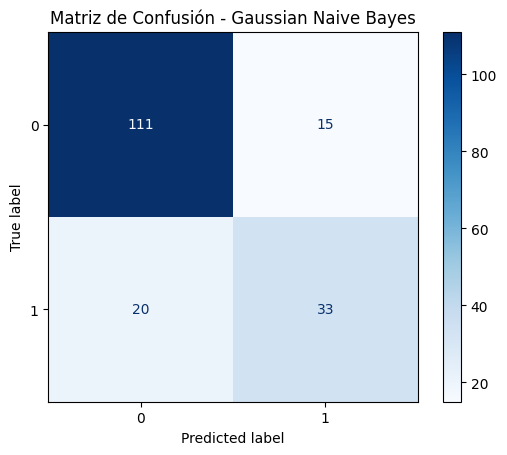

In [299]:
# Confusion matrix
y_pred_test = gaussian_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Gaussian Naive Bayes")
plt.show()

<h3>Multinomial Model</h3>

In [300]:
# Multinomial
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)

MultinomialNB()

In [301]:
get_metrics(multinomial_model)

Entrenamiento:
Accuracy: 0.9606741573033708
F1 Score: 0.9606741573033708
Precision: 0.9606741573033708
Recall: 0.9606741573033708
Mean Squared Error: 0.03932584269662921

Pruebas:
Accuracy: 0.8156424581005587
F1 Score: 0.8156424581005587
Precision: 0.8156424581005587
Recall: 0.8156424581005587
Mean Squared Error: 0.18435754189944134


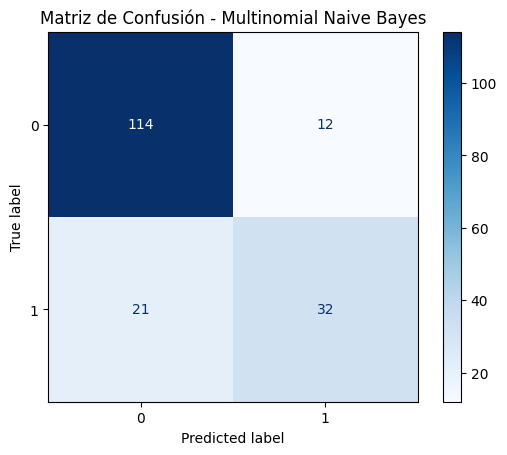

In [302]:
# Confusion matrix
y_pred_test = multinomial_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multinomial_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Multinomial Naive Bayes")
plt.show()

<h3>Bernoulli Model</h3>

In [303]:
# Bernoulli
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)

BernoulliNB()

In [304]:
get_metrics(bernoulli_model)

Entrenamiento:
Accuracy: 0.9199438202247191
F1 Score: 0.9199438202247191
Precision: 0.9199438202247191
Recall: 0.9199438202247191
Mean Squared Error: 0.0800561797752809

Pruebas:
Accuracy: 0.770949720670391
F1 Score: 0.770949720670391
Precision: 0.770949720670391
Recall: 0.770949720670391
Mean Squared Error: 0.22905027932960895


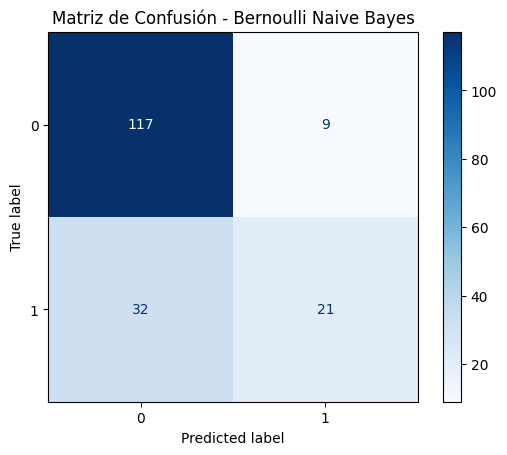

In [305]:
# Confusion matrix
y_pred_test = bernoulli_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Bernoulli Naive Bayes")
plt.show()

<h3>Análisis y comparación de modelos</h3>

Tras analizar los tres modelos podemos concluir que:
- Gaussian Naive Bayes tiene una precisión ligeramente superior para la clase 0 (84.77%), pero su rendimiento en la clase 1 (68.75%) es más bajo que el de Multinomial Naive Bayes.
- Multinomial Naive Bayes presenta un equilibrio mejorado entre ambas clases (84.44% para la clase 0 y 72.73% para la clase 1).
- Bernoulli Naive Bayes tiene la precisión más baja en ambas clases en comparación con los otros dos modelos.

En conclusión, se podría decir que el modelo Multinomial Naive Bayes es el más balanceado en términos de precisión para ambas clases y presenta un buen rendimiento general (Accuracy del 81.56%).

<h3>Optimización del modelo Multinomial</h3>

In [306]:
# Get optimized model metrics
def get_optimized_metrics(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    print("Entrenamiento:")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"F1 Score: {f1_score(y_train, y_pred_train, average='micro')}")
    print(f"Precision: {precision_score(y_train, y_pred_train, average='micro')}")
    print(f"Recall: {recall_score(y_train, y_pred_train, average='micro')}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}\n")

    print("Pruebas:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(f"F1 Score: {f1_score(y_test, y_pred_test, average='micro')}")
    print(f"Precision: {precision_score(y_test, y_pred_test, average='micro')}")
    print(f"Recall: {recall_score(y_test, y_pred_test, average='micro')}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

In [307]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
X = main_df["review"]
y = main_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train, y_train)
get_optimized_metrics(pipeline, X_train, X_test, y_train, y_test)

param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"\nMejores parámetros: {grid_search.best_params_}")
print(f"Mejor exactitud (cross-validation): {grid_search.best_score_}")

best_model = grid_search.best_estimator_
get_optimized_metrics(best_model, X_train, X_test, y_train, y_test)

Entrenamiento:
Accuracy: 0.8047752808988764
F1 Score: 0.8047752808988764
Precision: 0.8047752808988764
Recall: 0.8047752808988764
Mean Squared Error: 0.1952247191011236

Pruebas:
Accuracy: 0.7653631284916201
F1 Score: 0.7653631284916201
Precision: 0.7653631284916201
Recall: 0.7653631284916201
Mean Squared Error: 0.2346368715083799

Mejores parámetros: {'classifier__alpha': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Mejor exactitud (cross-validation): 0.8160051216389246
Entrenamiento:
Accuracy: 0.9831460674157303
F1 Score: 0.9831460674157303
Precision: 0.9831460674157303
Recall: 0.9831460674157303
Mean Squared Error: 0.016853932584269662

Pruebas:
Accuracy: 0.8268156424581006
F1 Score: 0.8268156424581006
Precision: 0.8268156424581006
Recall: 0.8268156424581006
Mean Squared Error: 0.17318435754189945


<h3>Guardar modelo optimizado</h3>

In [309]:
joblib.dump(best_model, '../models/best_model.pkl')

['../models/best_model.pkl']